## **`Data Cleaning`**

In [11]:
# Find the missing values in each column of dataframe.
tripdata.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

In [12]:
# Find the % of missing values in each column of dataframe.
tripdata.isnull().sum()*100 / len(tripdata)

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    15.310049
start_station_id      15.312357
end_station_name      16.245140
end_station_id        16.247605
start_lat              0.000000
start_lng              0.000000
end_lat                0.122205
end_lng                0.122205
member_casual          0.000000
dtype: float64

The dataset has a large number of missing values ​​and the imputation of missing values ​​may be the result of data error in subsequent analyses, so I dropped missing values.

In [13]:
#Dropping the missing values from a dataset.
tripdata.dropna(axis=0, inplace= True)


In [14]:
# Check the shape of the data after removing na values.
tripdata.shape

(4331707, 13)

I thoroughly analyzed the missing data and removed it. 1,388,170 rows were deleted.

## **Correcting and Transforming the Data**
Assess the data and decided which data variables are most applicable.

### Create and Typecaste the variables.
Typecasting of variables **started_at** & **ended_at** to **datetime** type is required  as I  calculate the length of each ride by subtracting the column "started_at"  from the column "ended_at". I  create duplicate column of started_at column name to it as **start_time** and change its data type as **datetime**.

In [15]:
# Change the name of colum 'started_at' to 'start_time' and type caste the data.
tripdata['start_time'] = tripdata['started_at'].astype('datetime64[ns]')
# Change the name of colum 'eneded_at' to 'end_time' and type caste the data.
tripdata['end_time'] = tripdata['ended_at'].astype('datetime64[ns]')
print('New variables have been created and successfully typecast.')

New variables have been created and successfully typecast.


### Rename the columns rideable_type and member_casual to make better sense.

In [16]:
# Renamed the column "rideable_type" as bike_type.
tripdata.rename(columns={'rideable_type': 'bike_type'}, inplace=True)
# Renamed the column "member_casual" as user_type.
tripdata.rename(columns={'member_casual': 'user_type'}, inplace=True)
print('Columns have been successfully renamed.')

Columns have been successfully renamed.


### Create a new column named as "trip_duration" that represents ride length in minutes.

In [17]:
#Create a new columm 'trip_duration' by subtracting 'start_time column from 'end_time' column.
tripdata['trip_duration'] = (tripdata['end_time']- tripdata['start_time'])
#Representing the ride lengths in minutes.
tripdata['trip_duration'] = np.round(tripdata['trip_duration'].dt.total_seconds() / 60, 2)
print('New Columns has been successfully created.')

New Columns has been successfully created.


### Creating new columns such as  "month", "year", "day_of_week", "hour" and change data type where required.These columns will helpful in better understanding of the overall patterns  or trends.

In [18]:
# Create a nonth column
tripdata['month'] = tripdata['start_time'].dt.month_name()
# Create a year column
tripdata['year'] = tripdata['start_time'].dt.year
# Create a day of week column
tripdata['day_of_week'] = tripdata['start_time'].dt.day_name()
# Create an hour column
tripdata['hour'] = tripdata['start_time'].dt.hour
# Create a new column for time in 12 hour format.
tripdata['time_hour'] = pd.to_datetime(tripdata['start_time'],format= '%H').dt.time
# Display the hour followed by the AM or PM indicator.
tripdata['start_time_hour'] = tripdata['start_time'].apply(lambda x: x.strftime('%I:%p'))
# Change the data type of columns
tripdata = tripdata.astype({'year':'int16', 'hour':'int8'})
print('New variables have been created and successfully typecast.')

New variables have been created and successfully typecast.


### Create a new column for seasons.

In [19]:
# Define function to map month to seasons
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Autumn'
    else:
        return 'Unknown'
# Apply the function to create the "Seasons" column
tripdata['seasons'] = tripdata['month'].apply(get_season)
print('New variable has been successfully created.')

New variable has been successfully created.


### Create a new column to calculate distance covered by cyclistic's members

In [20]:
# Function to calculate the distance between two points using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Calculate the distance
    distance = R * c

    return distance
# Calculate distance and add it to the DataFrame
tripdata['distance_km'] = tripdata.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)
# Decrease decimal points using the round function
tripdata['distance_km'] = tripdata['distance_km'].round(2)
print('New variable has been successfully created.')

New variable has been successfully created.


In [21]:
# Set the display options to show all the columns of dataset.
pd.set_option('display.max_columns', None)
tripdata.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,start_time,end_time,trip_duration,month,year,day_of_week,hour,time_hour,start_time_hour,seasons,distance_km
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,2023-01-21 20:05:42,2023-01-21 20:16:33,10.85,January,2023,Saturday,20,20:05:42,08:PM,Winter,0.84
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-10 15:37:36,2023-01-10 15:46:05,8.48,January,2023,Tuesday,15,15:37:36,03:PM,Winter,1.20
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,2023-01-02 07:51:57,2023-01-02 08:05:11,13.23,January,2023,Monday,7,07:51:57,07:AM,Winter,3.54
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-22 10:52:58,2023-01-22 11:01:44,8.77,January,2023,Sunday,10,10:52:58,10:AM,Winter,1.20
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,2023-01-12 13:58:01,2023-01-12 14:13:20,15.32,January,2023,Thursday,13,13:58:01,01:PM,Winter,1.20


In [22]:
tripdata.shape

(4331707, 24)

### Dropped the unnecessary data which is not  important for further data analysis. Thus, the system will take less time to execute further processes.

In [23]:
# Dropped the unnecessary variables.
tripdata.drop(['ride_id', 'start_station_id', 'end_station_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id','start_lat',
               'start_lng', 'end_lat', 'end_lng', 'start_time', 'end_time',  'hour'], axis=1, inplace=True)
print('Unnecessary variables have been uccessfully dropped.')

Unnecessary variables have been uccessfully dropped.


The trip duration column is very important to the analysis, I check anomalies carefully.

In [24]:
#Check the description of trip duration column
tripdata['trip_duration'].describe(include = "all")

count    4.331707e+06
mean     1.595184e+01
std      3.608720e+01
min     -5.457000e+01
25%      5.620000e+00
50%      9.800000e+00
75%      1.748000e+01
max      1.213630e+04
Name: trip_duration, dtype: float64

The function shows that the data frame also contains negative values which need to be removed.

### Check the Outliers.
The some of the best ways to identify the presence of outliers in data are **box plot** and **histogram**.  

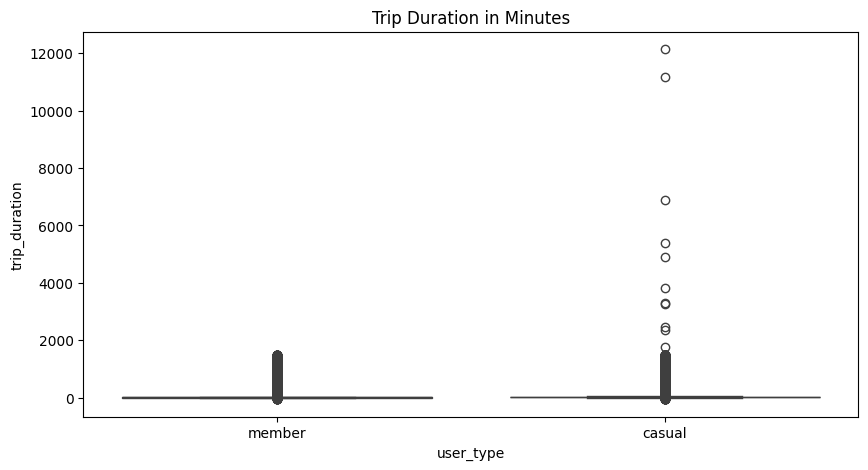

In [25]:
# Create Box plot for trip duration column, to check how the data is organizaed.
plt.figure(figsize=(10,5))
ax = sns.boxplot(data= tripdata, x= 'user_type', y= 'trip_duration')
plt.title('Trip Duration in Minutes')
plt.show()

While it may be tempting to label the longer trip durations of casual members as outliers, it is important to recognize that Cyclistic Bike Share has systematically recorded these durations. Additionally, it is evident that casual members have made payments for Cyclistic's services. Therefore, not all longer rides can be categorized as outliers. However, it is reasonable to consider trips with negative values less than minute as outliers and exclude them from the data.

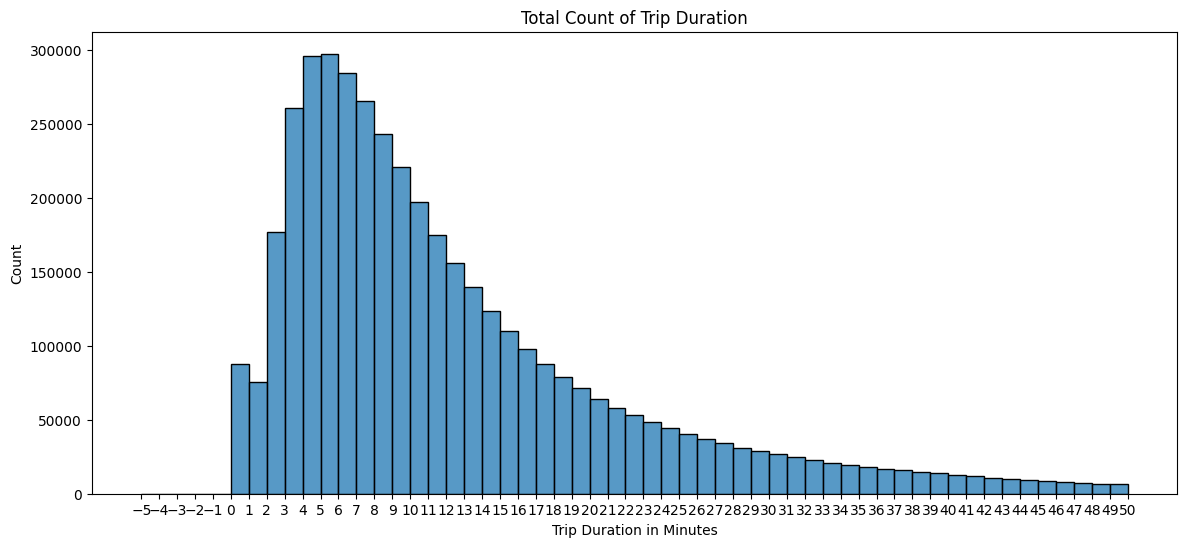

In [28]:
# Create histogram to show the distribution of data.
plt.figure(figsize=(14,6))
ax = sns.histplot(tripdata['trip_duration'],  bins = range(-5,51,1))
ax.set_xticks(range(-5,51,1))
ax.set_xlabel("Trip Duration in Minutes")
plt.title('Total Count of Trip Duration')
plt.show()

Based on the provided visualization, it is evident that the majority of trip durations fall within the range of 3 to 14 minutes.

## Removed the outliers.

In [31]:
# Filter rows where 'trip duration' is less than 1 minute and reset the column index
tripdata = tripdata[(tripdata['trip_duration'] > 0)]
tripdata = tripdata.reset_index()
# Drop the 'index' column
tripdata = tripdata.drop(columns=['index'])

In [32]:
#Check the description of 'trip duration column after removing outliers
tripdata["trip_duration"].describe(include = "all")

count    4.331138e+06
mean     1.595427e+01
std      3.608875e+01
min      2.000000e-02
25%      5.620000e+00
50%      9.800000e+00
75%      1.748000e+01
max      1.213630e+04
Name: trip_duration, dtype: float64

Describe function shows that there is a huge variation in between third and fourth quartile.

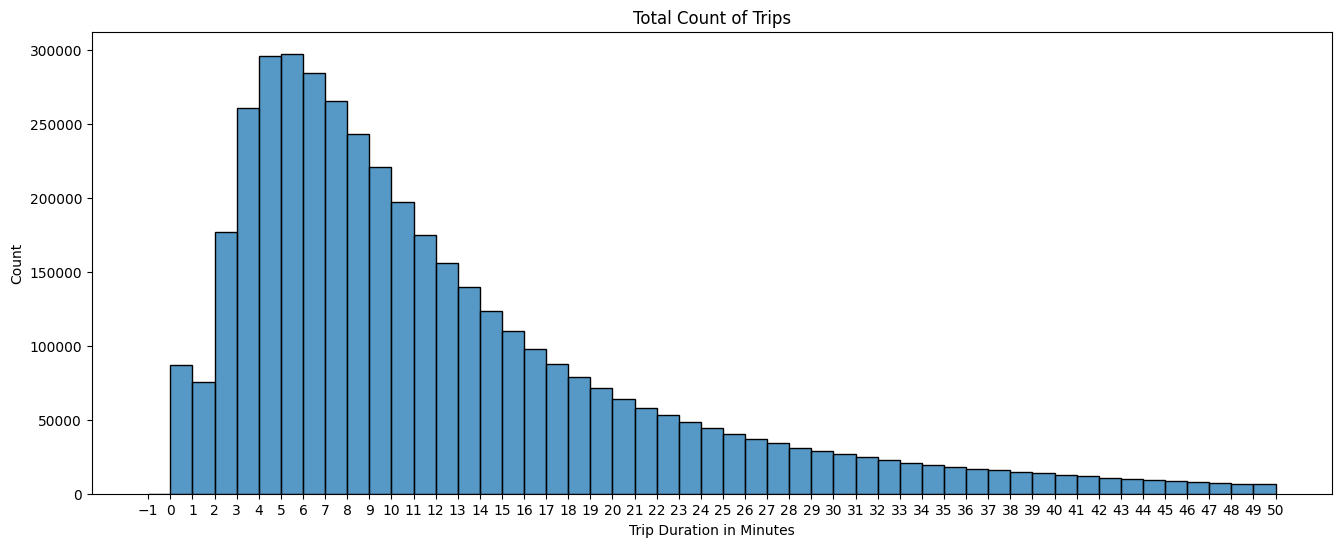

In [33]:
# Create histogram of to show the distribution of trips after removing outliers
plt.figure(figsize=(16,6))
ax = sns.histplot(tripdata['trip_duration'],  bins = range(-1,51,1))
ax.set_xticks(range(-1,51,1))
ax.set_xlabel("Trip Duration in Minutes")
plt.title('Total Count of Trips')
plt.show()

Above histogram shows that the data has a right-skewed distribution.

In [34]:
#Save the Cleaned data into CSV file in hard drive for analysis )
tripdata.to_csv('cyclistic_cleaned_final_data.csv', index=False)
print("Dataset exported as CSV file successfully.")

Dataset exported as CSV file successfully.
